Self Driving Car Engineer Nanodegree
Project: Advanced Lane Finding



In [1]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

In [2]:
# Pipeline for processing images

In [3]:
#Finding Corners

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob

# prepare object points
nx = 9#TODO: enter the number of inside corners in x
ny = 6#TODO: enter the number of inside corners in y

#Arrays to store object points and image points for all the images
objpoints = []
imgpoints = []

objp = np.zeros((nx*ny,3), np.float32)
#print(objp)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
#fname = 'camera_cal/calibration1.jpg'
#fname = 'calibration_test.png'
#print(os.listdir('camera_cal'))
for fname in images:
    img = mpimg.imread(fname)
    #plt.imshow(img)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    print(ret)
    # If found
    if ret == True:
        # add object points, image points
        imgpoints.append(corners)
        objpoints.append(objp)
        img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)
print(img.shape)    
#print(imgpoints)
#print(objpoints)
    #draw and display the corners
    #f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    #ax1.imshow(img)
    #cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    #plt.imshow(img)

False
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
True
True
True
True
(720, 1280, 3)


In [4]:
#Calibrate the camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
#dist = distortion coefficients
#mtx = camera matrix
#rvecs = rotation vector
#tvecs = translation vector
#retrieve teh grayscale image shape with gray.shape[::-1]-> (width, height in pixel values)

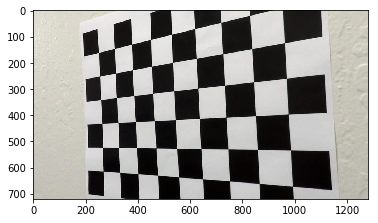

In [5]:
#Undistort the images
def undistort(img,mtx,dist):
    undst = cv2.undistort(img, mtx, dist, None, mtx)
    plt.imshow(undst)
    return undst

fname = 'camera_cal/calibration4.jpg'
img = mpimg.imread(fname)
undst = undistort(img,mtx,dist)

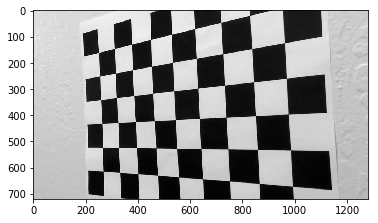

In [6]:
gray = cv2.cvtColor(undst, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap = 'gray')

In [7]:
def perspective_trans():
    pass
    #M = cv2.getPerspectiveTransform(src, dst)
    #Minv = cv2.getPerspectiveTransform(dst, src)
    #warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

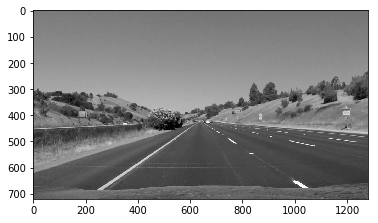

In [8]:
fname = 'test_images/straight_lines1.jpg'
img = mpimg.imread(fname)
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap = 'gray')

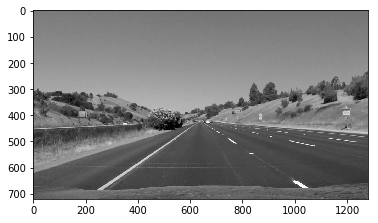

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap = 'gray')

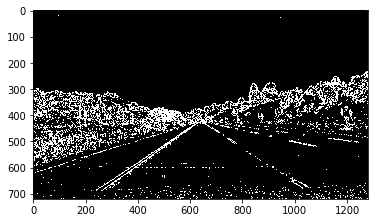

In [10]:
def abs_sobel_thresh(gray_img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Take the absolute value of the output from cv2.Sobel()
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel))
    # Scale the result to an 8-bit range (0-255)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Apply lower and upper thresholds
    thresh_min = thresh[0]
    thresh_max = thresh[1]
    # Create binary_output
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return binary_output

img_sobel = abs_sobel_thresh(gray,orient='x', sobel_kernel=3, thresh = (10, 200))
plt.imshow(img_sobel, cmap='gray')

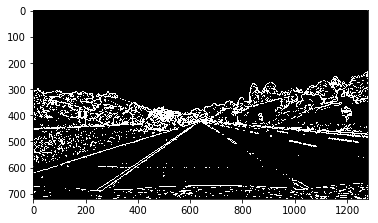

In [11]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    #plt.imshow(binary_output, cmap='gray')
    # Return the binary image
    return binary_output

img_sobel = mag_thresh(gray, sobel_kernel=3, mag_thresh = (20, 250))
plt.imshow(img_sobel, cmap='gray')

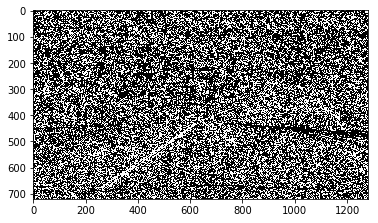

In [12]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    #plt.imshow(binary_output, cmap='gray')
    # Return the binary image
    return binary_output

img_sobel = dir_threshold(gray, sobel_kernel=3, thresh = (0.7, 1.3))
plt.imshow(img_sobel, cmap='gray')

In [13]:
def gen_threshold(img, min_threshold = 0, max_threshold = 255):
    binary_out = np.zeros_like(img)
    binary_out[(img >= min_threshold) & (s_channel <= max_threshold)] = 1
    return binary_out

In [14]:
#warp the image so the lines are straight - assume the image is undistorted
def unwarp(img):
    img_size = (img.shape[1], img.shape[0])
    center = img.shape[1]//2
    x_btm = 440
    x_top = 45+72
    y_btm = 720
    y_top = 500
    src = np.float32([[center - x_btm, y_btm],[center + x_btm, y_btm],[center - x_top, y_top],[center + x_top, y_top]])
    dst = np.float32([[center - x_btm,y_btm],[center + x_btm,y_btm],[center - x_btm,0],[center + x_btm,0]])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped.astype(np.uint8), M, Minv

In [15]:
def poly_lanes(binary_warped):
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        #cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        #(0,255,0), 2) 
        #cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        #(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    y_eval = 720

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds, left_curverad, right_curverad

1200.77955601 1584.3601679


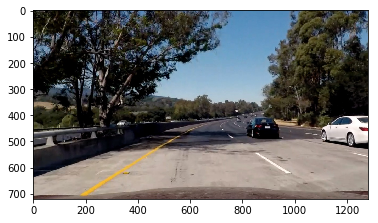

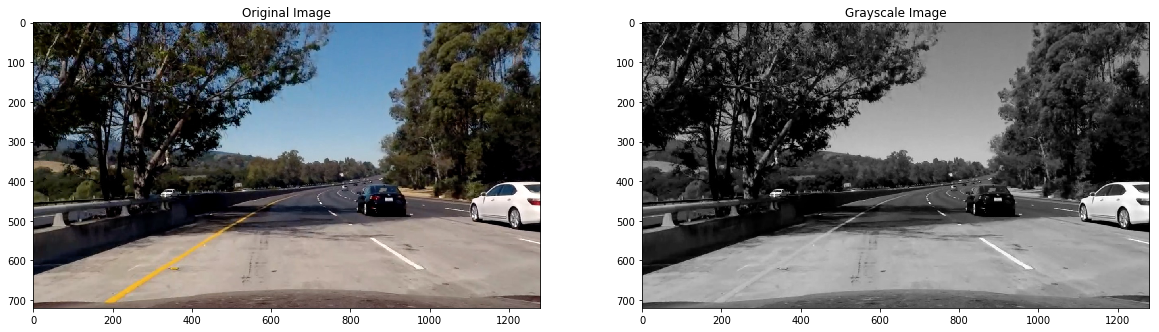

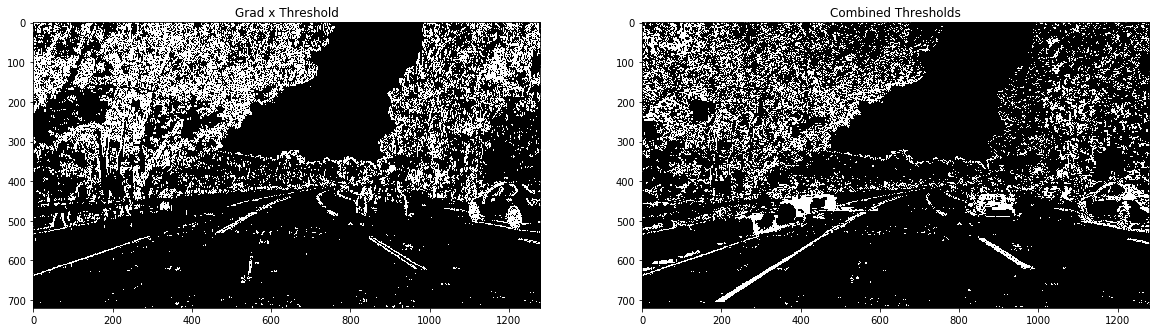

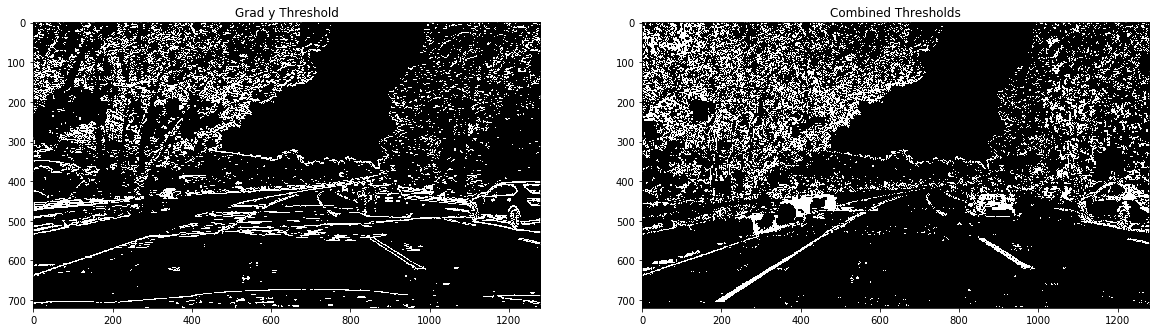

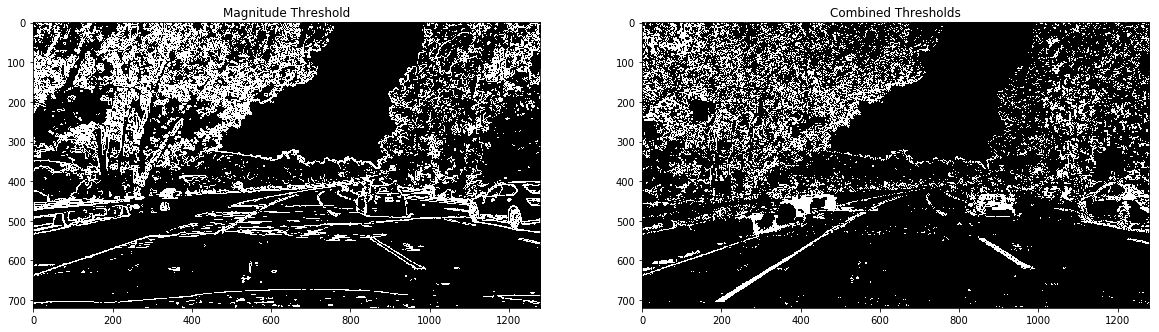

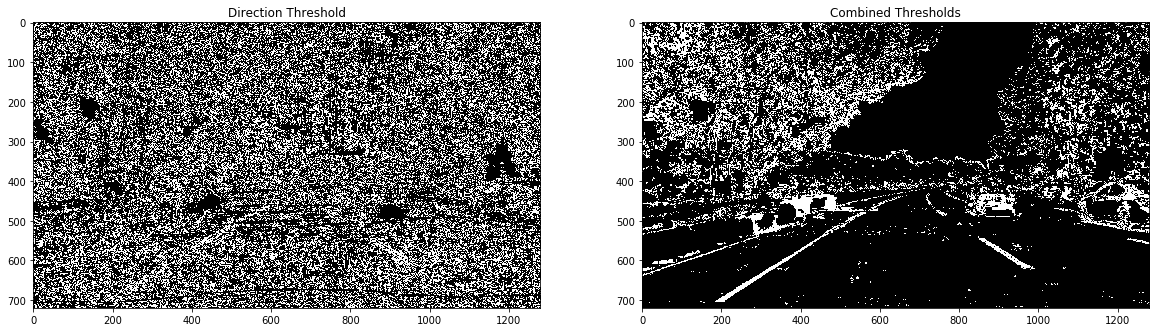

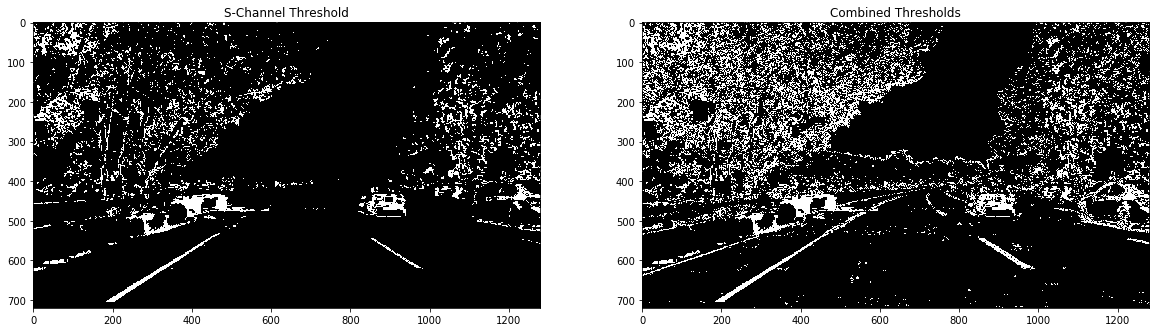

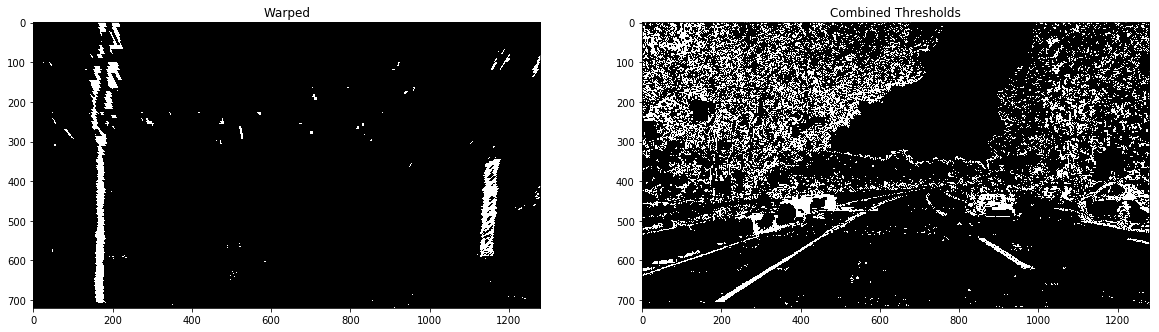

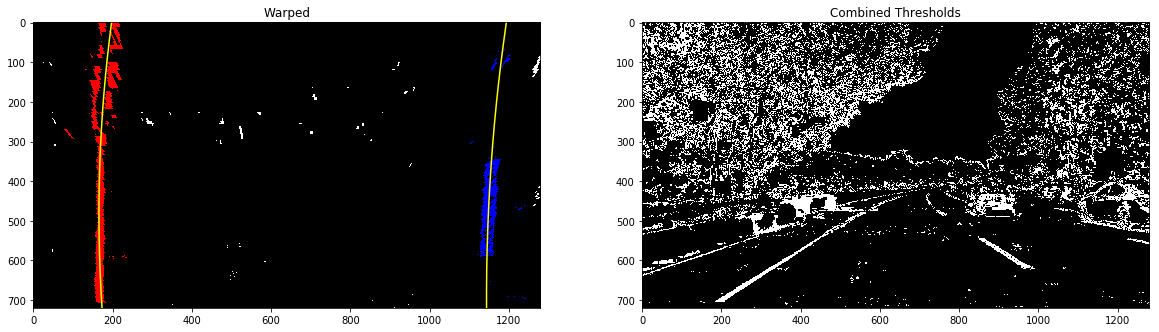

In [16]:
ksize = 3
fname = 'test_images/test5.jpg'
img = mpimg.imread(fname)
undist = np.copy(img)
img = undistort(img,mtx,dist)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
hls = hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=ksize, thresh=(10, 200))
grady = abs_sobel_thresh(gray, orient='y', sobel_kernel=ksize, thresh=(20, 250))
mag_binary = mag_thresh(gray, sobel_kernel=ksize, mag_thresh=(20, 200))
dir_binary = dir_threshold(gray, sobel_kernel=ksize, thresh=(0.7, 1.3))
# Threshold color channel
s_binary = gen_threshold(s_channel,170,255)


comb_binary = np.dstack((gradx, grady, mag_binary))

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | (s_binary==1)] = 1

combined_warped, M, Minv = unwarp(combined)

#Detect lane lines
left_fit, right_fit, left_lane_inds, right_lane_inds, left_curverad, right_curverad = poly_lanes(combined_warped)
ploty = np.linspace(0, combined_warped.shape[0]-1, combined_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img = np.dstack((combined_warped*255, combined_warped*255, combined_warped*255))
nonzero = combined_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

#plot the images
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(img)
ax2.imshow(gray,cmap = 'gray')
ax1.set_title('Original Image')
ax2.set_title('Grayscale Image')

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(gradx, cmap = 'gray')
ax2.imshow(combined,cmap = 'gray')
ax1.set_title('Grad x Threshold')
ax2.set_title('Combined Thresholds')

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(grady, cmap = 'gray')
ax2.imshow(combined,cmap = 'gray')
ax1.set_title('Grad y Threshold')
ax2.set_title('Combined Thresholds')

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(mag_binary, cmap = 'gray')
ax2.imshow(combined,cmap = 'gray')
ax1.set_title('Magnitude Threshold')
ax2.set_title('Combined Thresholds')

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(dir_binary,cmap = 'gray')
ax2.imshow(combined,cmap = 'gray')
ax1.set_title('Direction Threshold')
ax2.set_title('Combined Thresholds')

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(s_binary,cmap = 'gray')
ax2.imshow(combined,cmap = 'gray')
ax1.set_title('S-Channel Threshold')
ax2.set_title('Combined Thresholds')

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(combined_warped,cmap = 'gray')
ax2.imshow(combined,cmap = 'gray')
ax1.set_title('Warped')
ax2.set_title('Combined Thresholds')

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(out_img)
ax1.plot(left_fitx, ploty, color='yellow')
ax1.plot(right_fitx, ploty, color ='yellow')
ax2.imshow(combined,cmap = 'gray')
ax1.set_title('Warped')
ax2.set_title('Combined Thresholds')

print(left_curverad, right_curverad)

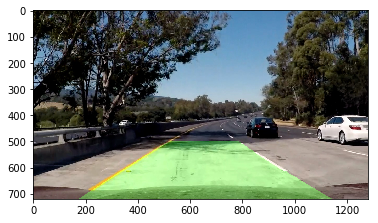

In [17]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(combined_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.imshow(result)